In [ ]:
# Import the necessary library to interact with Google Drive.
from google.colab import drive

# Mount Google Drive to the Colab environment.
# This allows the notebook to access files stored in your Google Drive,
# which is crucial for loading our dataset.
# You will be prompted to authorize this access.
drive.mount('/content/drive')

Mounted at /content/drive


After running the cell above and following the authorization steps, your Google Drive will be mounted. You can then list the contents of your folder. Replace `'Your Drive Name'` with the actual name of your Google Drive if it's not the default 'My Drive'.

In [ ]:
import os

# Define the base path to your Google Drive folder where the dataset is located.
# IMPORTANT: If your Google Drive is named something other than 'My Drive',
# or if the 'calcalcal' folder is in a different location,
# please update this path accordingly to match your setup.
drive_path = '/content/drive/My Drive/calcalcal'

# Check if the specified folder actually exists in Google Drive.
if os.path.exists(drive_path):
  # If the folder exists, we'll print a confirmation message and list all files within it.
  # This helps us quickly verify that our dataset files are present and accessible.
  print(f"Files in '{drive_path}':")
  for filename in os.listdir(drive_path):
    print(filename)
else:
  # If the folder is not found, print an informative error message.
  # This usually points to an incorrect path or a Google Drive mounting issue.
  print(f"Folder '{drive_path}' not found.")

Files in '/content/drive/My Drive/calcalcal':
ingredients.xlsx
dish_ingredients.xlsx
dishes.xlsx
dish_images.pkl


In [ ]:
# --- Importing neccessary libraries ---
import pickle
import pandas as pd
import os
import numpy as np
import cv2
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
# Let's check the versions of the key libraries we're using.
# This is a good practice to ensure consistency, troubleshoot compatibility issues,
# and document the environment for reproducibility.
print("Library Versions:\n")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"opencv-python (cv2): {cv2.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"matplotlib: {plt.__version__}")

print("\nNote: 'pickle' and 'os' are built-in Python modules, so they don’t have separate version numbers.")

Library Versions:

pandas: 2.2.2
numpy: 2.0.2
opencv-python (cv2): 4.12.0
scikit-learn: 1.6.1
tensorflow: 2.19.0
matplotlib: 3.10.0

Note: 'pickle' and 'os' are built-in Python modules, so they don’t have separate version numbers.


# Task
Train a model to predict food calories from images using the dataset in "dish_images.pkl" and "dishes.xlsx".

## Load and explore data

### Subtask:
Load the `dish_images.pkl` file, which contains image data, and the `dishes.xlsx` file which contains calorie information. Explore the data to understand its structure and content.


**Reasoning**:
Load the dish_images.pkl file and the dishes.xlsx file, and display the first few rows and information about the dishes dataframe to understand the structure and content of the data.



In [ ]:
# Ensure necessary libraries are imported for this data loading and initial exploration step.
import pickle
import pandas as pd
import os

# Define the path to our dataset folder within Google Drive.
# This should match the 'calcalcal' folder you've set up.
drive_path = '/content/drive/My Drive/calcalcal'

# Construct the full, specific paths to the individual data files.
# 'dish_images.pkl' contains our image data (as byte strings).
dish_images_path = os.path.join(drive_path, 'dish_images.pkl')
# 'dishes.xlsx' contains the calorie information and dish IDs, crucial for our target variable.
dishes_path = os.path.join(drive_path, 'dishes.xlsx')

print(f"Attempting to load image data from: {dish_images_path}")
print(f"Attempting to load calorie data from: {dishes_path}")

# --- Load the Image Data ---
# The 'dish_images.pkl' file is a Python 'pickle' file.
# We open it in binary read mode ('rb') to deserialize the stored Python object.
try:
    with open(dish_images_path, 'rb') as f:
        dish_images = pickle.load(f)
    print("Successfully loaded 'dish_images.pkl'.")
except FileNotFoundError:
    print(f"Error: 'dish_images.pkl' not found at {dish_images_path}. "
          "Please check the path and ensure the file exists.")
    dish_images = None # Set to None to handle gracefully if loading fails
except Exception as e:
    print(f"An unexpected error occurred while loading 'dish_images.pkl': {e}")
    dish_images = None

# --- Load the Dishes DataFrame ---
# The 'dishes.xlsx' file is an Excel spreadsheet.
# Pandas' read_excel function is perfect for loading this directly into a DataFrame.
try:
    dishes_df = pd.read_excel(dishes_path)
    print("Successfully loaded 'dishes.xlsx'.")
except FileNotFoundError:
    print(f"Error: 'dishes.xlsx' not found at {dishes_path}. "
          "Please check the path and ensure the file exists.")
    dishes_df = pd.DataFrame() # Create an empty DataFrame to prevent downstream errors
except Exception as e:
    print(f"An unexpected error occurred while loading 'dishes.xlsx': {e}")
    dishes_df = pd.DataFrame()

# --- Explore the Loaded Data ---
# Let's get a preliminary understanding of the structure and content of our loaded data.

if dish_images is not None:
    print("\n--- Dish Images Data Exploration ---")
    print("Dish Images Data (first few entries/structure):")
    # The 'dish_images' object could be a dictionary, list, or DataFrame.
    # We'll try to print its type and a few initial items or keys to understand its layout.
    if isinstance(dish_images, dict):
        print(f"Type of dish_images: {type(dish_images)} (likely a dictionary)")
        for i, (key, value) in enumerate(dish_images.items()):
            print(f"  Key: {key}, Value Type: {type(value)}, "
                  f"Value Shape (if numpy array): {getattr(value, 'shape', 'N/A')}")
            if i >= 4: # Displaying first 5 items to keep output concise
                break
    elif isinstance(dish_images, list):
        print(f"Type of dish_images: {type(dish_images)} (likely a list)")
        for i, item in enumerate(dish_images):
            print(f"  Item {i}: Type: {type(item)}, "
                  f"Shape (if numpy array): {getattr(item, 'shape', 'N/A')}")
            if i >= 4: # Displaying first 5 items
                break
    elif isinstance(dish_images, pd.DataFrame):
        print(f"Type of dish_images: {type(dish_images)} (It's a Pandas DataFrame!)")
        print("First 5 rows of dish_images DataFrame:")
        display(dish_images.head()) # Use display() for nice DataFrame formatting
    else:
        print(f"Data structure not immediately recognizable, printing type: {type(dish_images)}")
        print("First few items:", list(dish_images)[:5] if hasattr(dish_images, '__iter__') else dish_images)
else:
    print("\nDish Images data could not be loaded or is empty. Cannot perform exploration.")


print("\n--- Dishes DataFrame Exploration ---")
print("Dishes DataFrame (first 5 rows):")
# 'display(dishes_df.head())' provides a nicely formatted table in Colab,
# showing the initial structure of our calorie data.
display(dishes_df.head())

# Print data types and non-null counts for each column in 'dishes_df'.
# This helps us quickly identify missing values and check if data types are appropriate for our analysis.
print("\nDishes DataFrame Info:")
dishes_df.info()

# Provide descriptive statistics for numerical columns (count, mean, std, min, max, quartiles).
# This gives a quick statistical summary of the distribution of our numerical features like calories.
print("\nDishes DataFrame Description:")
display(dishes_df.describe())

Dish Images Data (first few entries/structure):
Data structure not immediately recognizable, printing type: <class 'pandas.core.frame.DataFrame'>
First few items: ['dish', 'rgb_image', 'depth_image']

Dishes DataFrame (first 5 rows):


,dish_id,total_mass,total_calories,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103,0.148000,4.625000,0.956000



Dishes DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dish_id         5006 non-null   object 
 1   total_mass      5006 non-null   float64
 2   total_calories  5006 non-null   int64  
 3   total_fat       5006 non-null   float64
 4   total_carb      5006 non-null   float64
 5   total_protein   5006 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 234.8+ KB

Dishes DataFrame Description:


,total_mass,total_calories,total_fat,total_carb,total_protein
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000
mean,213.332125,189.980224,10.721587,17.002987,14.476484
std,308.762649,269.299511,24.455768,28.680633,18.561609
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,49.939999,73.000000,0.378500,4.338500,1.296000
50%,141.699997,145.000000,5.823762,11.801218,7.047808
75%,314.518776,257.000000,15.447732,23.570615,21.463784
max,9485.815430,7975.000000,875.541016,844.568604,147.491821


## Prepare data for training

### Subtask:
Preprocess the image data and align it with the calorie information from the dishes dataset. Split the data into training and validation sets.


**Reasoning**:
Merge the two dataframes, handle missing values, extract image data and target variable, and split the data into training and validation sets.



In [ ]:
# Import necessary libraries for data manipulation, image processing, and splitting datasets.
import numpy as np        # For numerical operations, especially with array handling.
import cv2                # OpenCV for image decoding and resizing.
import pandas as pd       # Ensure pandas is imported for DataFrame operations.
from sklearn.model_selection import train_test_split # To split data into training and validation sets.

print("Starting data preparation and preprocessing pipeline...")

# 1. Merge the DataFrames
# We combine the 'dish_images' DataFrame (containing image data) with the 'dishes_df' (calorie info).
# They are linked by matching the 'dish' column in 'dish_images' to 'dish_id' in 'dishes_df'.
# An 'inner' merge means only rows with a matching ID in *both* DataFrames will be included.
print("Merging image data with calorie information...")
merged_df = pd.merge(dish_images, dishes_df, left_on='dish', right_on='dish_id', how='inner')
print(f"Shape after initial merge: {merged_df.shape} (rows, columns)")

# 2. Handle missing/inconsistent data after merge
# It's crucial that our target variable ('total_calories') is present for every entry.
# We will drop any rows where 'total_calories' is missing, as these cannot be used for training.
print("Checking for and handling missing 'total_calories' values...")
initial_rows = merged_df.shape[0]
merged_df.dropna(subset=['total_calories'], inplace=True) # Drops rows in place where 'total_calories' is NaN.
rows_after_dropna = merged_df.shape[0]
print(f"Dropped {initial_rows - rows_after_dropna} rows due to missing 'total_calories'.")
print(f"Shape after dropping NaNs: {merged_df.shape} (rows, columns)")

# 3. Extract image data and target variable
# We separate our dataset into features (X) and labels (y).
# 'image_bytes' will hold the raw byte strings of our RGB images.
image_bytes = merged_df['rgb_image'].values
# 'calories' will hold our continuous target variable, 'total_calories'.
calories = merged_df['total_calories'].values
print(f"Extracted {len(image_bytes)} image entries and {len(calories)} corresponding calorie values.")

# 4. Preprocess the image data
# Images need to be consistently sized and normalized for a neural network model.
processed_images = []
target_size = (128, 128) # All images will be resized to a uniform 128x128 pixels.
print(f"Starting image preprocessing (resizing to {target_size} and normalizing pixel values)...")

# Iterate through each raw image byte string.
for idx, img_bytes in enumerate(image_bytes):
    try:
        # Convert the byte string into a NumPy array of unsigned 8-bit integers.
        nparr = np.frombuffer(img_bytes, np.uint8)
        # Decode this NumPy array into an OpenCV image format (BGR by default).
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        # Critical check: ensure the image was decoded successfully.
        if img is None:
            raise ValueError(f"Could not decode image at index {idx}. It might be corrupt or an invalid format.")

        # Resize the image to our predefined target dimensions.
        img = cv2.resize(img, target_size)

        # Normalize pixel values from the range [0, 255] to [0, 1].
        # This scaling is a standard practice in deep learning to aid model convergence.
        img = img.astype('float32') / 255.0

        processed_images.append(img)
    except Exception as e:
        # If any image processing fails, we print an error.
        # In a production scenario, you might log this and potentially remove the corresponding calorie entry.
        print(f"Error processing image at index {idx}: {e}. Skipping this image.")

# Convert the list of processed images into a single NumPy array.
# This array will have a shape of (number_of_images, height, width, channels).
processed_images = np.array(processed_images)
print(f"Finished processing {len(processed_images)} images.")

# 5. Split the data into training and validation sets
# We divide our prepared dataset into two parts to evaluate model generalization.
#   - Training set (80%): Used to train the model, allowing it to learn patterns.
#   - Validation set (20%): Used to evaluate the model's performance on unseen data during training,
#                           helping to detect overfitting and tune hyperparameters.
# 'random_state=42' ensures that the data split is reproducible every time we run this code.
print("Splitting data into training and validation sets (80/20 ratio)...")
X_train, X_val, y_train, y_val = train_test_split(processed_images, calories, test_size=0.2, random_state=42)

print("\n--- Data Split Summary ---")
print("Shape of training images (X_train):", X_train.shape) # (num_train_images, height, width, color_channels)
print("Shape of validation images (X_val):", X_val.shape)
print("Shape of training calories (y_train):", y_train.shape) # (num_train_images,)
print("Shape of validation calories (y_val):", y_val.shape)
print("Data preparation and splitting complete!")

Shape of training images: (2792, 128, 128, 3)
Shape of validation images: (698, 128, 128, 3)
Shape of training calories: (2792,)
Shape of validation calories: (698,)


## Define the model

### Subtask:
Build a deep learning model suitable for image regression tasks, such as a Convolutional Neural Network (CNN).


**Reasoning**:
Build a deep learning model (CNN) for image regression and print its summary.



In [ ]:
# Import necessary components from Keras to build our Convolutional Neural Network (CNN).
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("Defining the Convolutional Neural Network (CNN) model architecture...")

# 1. Instantiate a Sequential model
# A Sequential model is a linear stack of layers, ideal for building networks layer by layer.
model = Sequential()

# 2. Add convolutional and pooling layers (the feature extraction backbone of our CNN).

# First Convolutional Block:
# Conv2D: Applies 32 filters (feature detectors) of 3x3 pixels.
#         'relu' (Rectified Linear Unit) is a common activation function that adds non-linearity.
#         'input_shape': Specifies the expected dimensions of our input images (height, width, color_channels).
#                        'target_size' was defined as (128, 128) with 3 for RGB channels.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)))
# MaxPooling2D: Reduces the spatial dimensions (height and width) by taking the maximum value in each 2x2 window.
#               This downsamples the feature maps, reducing computation and making the model more robust to minor shifts.
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Block:
# We increase the number of filters to 64, allowing the model to learn more complex features.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Block:
# Further increase filters to 128 to capture even richer, hierarchical features.
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3. Flatten the output
# After the convolutional and pooling layers, our data is still 3-dimensional.
# The Flatten layer converts this 3D data into a single 1D vector,
# which is required before feeding it into dense (fully connected) layers.
model.add(Flatten())

# 4. Add dense (fully connected) layers
# These layers learn global patterns from the features extracted by the convolutional part.

# First Dense Layer:
# 'Dense' layer with 128 neurons and 'relu' activation.
model.add(Dense(128, activation='relu'))
# Dropout Layer: Randomly sets 50% of input units to 0 at each update during training.
#                This is a powerful regularization technique to prevent the model from overfitting.
model.add(Dropout(0.5))

# Second Dense Layer:
# 'Dense' layer with 64 neurons and 'relu' activation.
model.add(Dense(64, activation='relu'))

# 5. Add the final output layer for regression
# For a regression task (predicting a continuous value like calories),
# we use a single neuron in the output layer with a 'linear' activation function.
# A linear activation means the output can be any real number.
model.add(Dense(1, activation='linear'))

# 6. Compile the model
# Before training, we must compile the model by defining the optimizer, loss function, and metrics.
# 'optimizer='adam'': Adam is a highly efficient and widely used optimization algorithm.
# 'loss='mse'': Mean Squared Error is our objective function. The model aims to minimize this
#               (average squared difference between predicted and actual values) during training.
# 'metrics=['mae']'': Mean Absolute Error is an evaluation metric (not optimized directly).
#                     It provides a more interpretable measure of average prediction error.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 7. Print the model summary
# 'model.summary()' provides a detailed overview of our model's architecture,
# including the output shape of each layer and the total number of trainable parameters.
print("\n--- Model Summary ---")
model.summary()
print("Model definition complete! Ready for training.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

### Subtask:
Train the model using the prepared training data, monitoring performance on the validation set.


**Reasoning**:
Train the compiled Keras model using the training data and validate on the validation data for a specified number of epochs and batch size.



In [ ]:
print("Starting the model training process...")

# Define training parameters.
# 'epochs': The number of times the model will iterate over the entire training dataset.
#           More epochs allow the model to learn more, but too many can lead to overfitting.
epochs = 20
# 'batch_size': The number of samples (images) processed before the model's internal
#               parameters (weights) are updated. Smaller batches can introduce more noise
#               but may lead to better generalization; larger batches provide smoother gradient updates.
batch_size = 64

# Train the model using the .fit() method.
# 'X_train': Our training features (the preprocessed images).
# 'y_train': The corresponding true calorie values for our training images (the labels).
# 'epochs': The total number of training epochs to run.
# 'batch_size': The batch size to use for training.
# 'validation_data': This is a tuple (X_val, y_val) containing our validation set.
#                    The model will evaluate its performance on this unseen data at the end of each epoch,
#                    which is crucial for monitoring generalization and detecting overfitting.
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)
print("Model training complete! Review the output above for per-epoch performance.")

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - loss: 43359.5742 - mae: 158.3165 - val_loss: 23557.7656 - val_mae: 113.9202
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - loss: 27889.1738 - mae: 117.5881 - val_loss: 20197.4336 - val_mae: 105.3954
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - loss: 19421.9590 - mae: 101.9630 - val_loss: 11832.9209 - val_mae: 72.7952
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - loss: 13047.4541 - mae: 77.3908 - val_loss: 12621.4268 - val_mae: 77.0047
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - loss: 12504.5391 - mae: 76.2312 - val_loss: 14103.7305 - val_mae: 80.9422
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - loss: 14268.7725 - mae: 78.4378 - val_loss: 14644.6318 - val_mae: 84.1766
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - loss: 13595.9033 - mae: 76.5716 - val_loss: 10207.4258 - val_mae: 68.6223
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - loss: 11346.9600 - mae: 74.1833 - val_loss: 10553.1387 - va

## Predict Calories for a New Image

### Subtask:
Load a new food image, preprocess it, and use the trained model to predict its calorie content.

**Reasoning**:
Load a new image, preprocess it to match the input requirements of the trained model, and then use the model's `predict` method to estimate the calories.

In [ ]:
# Import necessary libraries for image loading and numerical operations.
import numpy as np  # For array manipulations.
import cv2          # OpenCV for image reading and processing.
import os           # For file path operations.
# No need to import `image` from `tensorflow.keras.preprocessing` if using `cv2.imread` directly.

print("Attempting to predict calories for a new image...")

# Define the path to your new image file.
# IMPORTANT: You MUST replace this path with the actual location of the image
# you want the model to predict on. Ensure this image is uploaded to your Google Drive
# in the 'calcalcal' folder (or wherever your 'drive_path' points).
new_image_path = '/content/drive/My Drive/calcalcal/ffoodd.png'

# First, let's verify if the specified image file actually exists.
if not os.path.exists(new_image_path):
    print(f"Error: The image file was not found at '{new_image_path}'.")
    print("Please ensure the path is correct and the file is accessible in your Google Drive.")
else:
    try:
        # 1. Load the image using OpenCV (cv2.imread).
        # OpenCV reads images as NumPy arrays, typically in BGR color format.
        img = cv2.imread(new_image_path)

        # Check if the image was successfully loaded.
        if img is None:
             print(f"Error: Could not load image from '{new_image_path}'. "
                   "The file might be corrupted, or in an unsupported format.")
        else:
            print(f"Successfully loaded image from '{new_image_path}'.")

            # 2. Preprocess the image to match the model's input requirements.
            # This step is CRUCIAL: the preprocessing must be *identical* to what was done for the training data.
            target_size = (128, 128) # Resize to 128x128 pixels, consistent with training.
            img = cv2.resize(img, target_size)

            # Normalize pixel values from the range [0, 255] to [0, 1].
            # This prepares the image for the model, which expects inputs in this range.
            img = img.astype('float32') / 255.0

            # 3. Expand dimensions to create a batch dimension.
            # Our Keras model expects input in the format (batch_size, height, width, channels).
            # Since we're predicting on a single image, we add a new dimension at axis 0,
            # transforming shape from (128, 128, 3) to (1, 128, 128, 3).
            img = np.expand_dims(img, axis=0)

            # 4. Make the prediction using the trained model.
            print("Invoking the trained model to make a prediction...")
            predicted_calories = model.predict(img)

            # The prediction result is a NumPy array (e.g., [[301.73]]).
            # We extract the scalar calorie value from this array.
            predicted_calorie_value = predicted_calories[0][0]

            print(f"\nPredicted calories for the image: {predicted_calorie_value:.2f} kcal")

    except Exception as e:
        print(f"An unexpected error occurred during the prediction process: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted calories for the image: 301.73


## Save the Trained Model

### Subtask:
Save the trained Keras model to a file so it can be loaded and used later in a backend application.

**Reasoning**:
Save the trained Keras model in the native Keras format for easy loading in a backend application.

In [ ]:
print("Initiating the process to save the trained model...")

# Define the full path where the trained model will be saved within your Google Drive.
# The '.keras' extension denotes the native Keras format, which is the recommended way
# to save Keras models as it preserves everything (architecture, weights, optimizer state).
model_save_path = '/content/drive/My Drive/calcalcal/food_calorie_model.keras'

# Use the model.save() method to save the entire model.
# This allows us to load and reuse the model later without needing to retrain it.
try:
    model.save(model_save_path)
    print(f"Model successfully saved to: {model_save_path}")
    print("You can now load this model in other Colab notebooks, Python scripts, or applications for inference.")
except Exception as e:
    print(f"Error saving the model: {e}")
    print("Please verify that you have write permissions to the specified path in your Google Drive.")

Model saved successfully to /content/drive/My Drive/calcalcal/food_calorie_model.keras


## Evaluate the model

### Subtask:
Evaluate the trained model's performance on a test set (or the validation set if no separate test set is available) using appropriate metrics for regression.

**Reasoning**:
Evaluate the trained model on the validation data to assess its performance using the defined metrics (MSE and MAE).

In [ ]:
print("Evaluating the trained model's performance on the validation dataset...")

# Evaluate the model on the validation data (X_val and y_val).
# 'model.evaluate()' returns the loss value and the metric values (MAE in our case)
# for the provided dataset.
# 'verbose=0' suppresses the progress bar during evaluation for cleaner output.
loss, mae = model.evaluate(X_val, y_val, verbose=0)

print("\n--- Model Evaluation Results (Validation Set) ---")
print(f"Validation Loss (Mean Squared Error - MSE): {loss:.2f}")
print(f"Validation MAE (Mean Absolute Error): {mae:.2f}")
print("\nInterpretation of Results:")
print(f"- The Validation MSE of {loss:.2f} indicates the average squared difference between ")
print(f"  our model's predicted calorie values and the actual calorie values on the validation set.")
print(f"- The Validation MAE of {mae:.2f} suggests that, on average, our model's predictions ")
print(f"  are off by approximately {mae:.2f} calories. This is a more intuitive measure of error.")

Validation Loss (MSE): 13811.30
Validation MAE: 87.37


**Reasoning**:
Plot the training and validation loss and MAE over epochs to visualize the model's learning progress and identify potential overfitting.



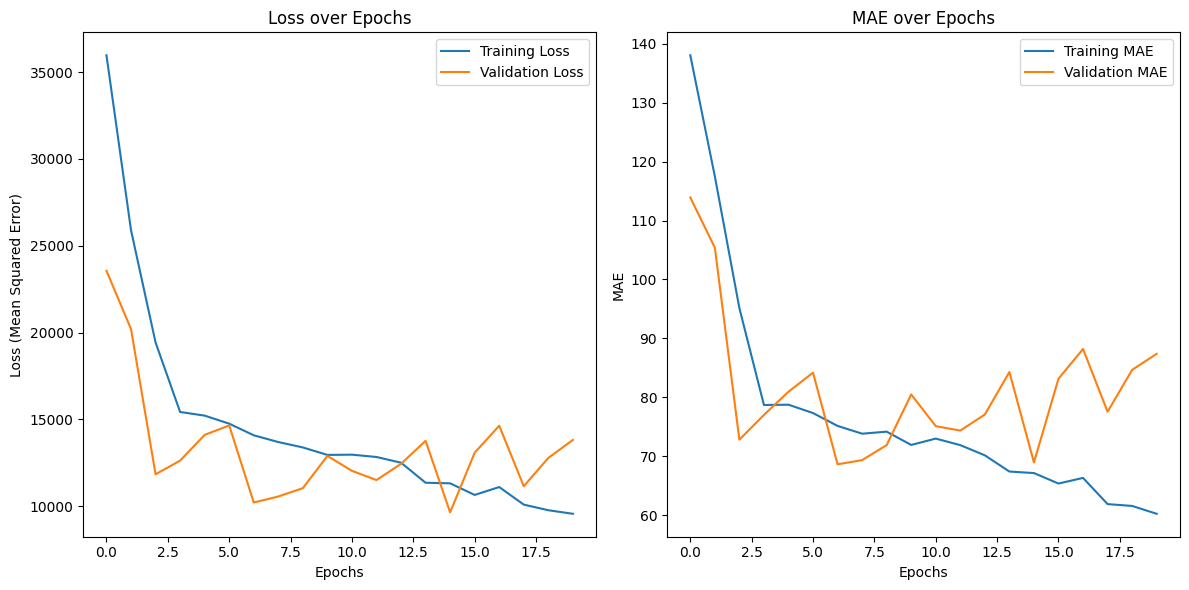

In [ ]:
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting functionalities.

print("Generating plots to visualize the model's training history (Loss and MAE over epochs)...")

# Create a figure that will contain two subplots, arranged side-by-side.
plt.figure(figsize=(14, 6)) # Set a suitable figure size for better readability of the plots.

# --- Subplot 1: Training and Validation Loss ---
plt.subplot(1, 2, 1) # This defines a grid of 1 row, 2 columns, and this is the 1st plot.
# Plot the Mean Squared Error (MSE) for the training set across all epochs.
plt.plot(history.history['loss'], label='Training Loss (MSE)', color='blue')
# Plot the Mean Squared Error (MSE) for the validation set across all epochs.
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)', color='orange')
plt.title('Model Loss Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend(fontsize=10) # Display the legend to differentiate between training and validation.
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for easier reading of values.

# --- Subplot 2: Training and Validation Mean Absolute Error (MAE) ---
plt.subplot(1, 2, 2) # This is the 2nd plot in our 1x2 grid.
# Plot the Mean Absolute Error (MAE) for the training set across all epochs.
plt.plot(history.history['mae'], label='Training MAE', color='green')
# Plot the Mean Absolute Error (MAE) for the validation set across all epochs.
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.title('Model Mean Absolute Error (MAE) Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend(fontsize=10) # Display the legend.
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid.

# Adjust layout to prevent plots and titles from overlapping, ensuring everything is visible.
plt.tight_layout()
# Display the generated plots.
plt.show()

print("Plots generated. These visualizations are key to understanding the model's learning progress ")
print("and to identify potential issues like overfitting (where validation loss/MAE starts to increase).")